# Aim 1

## おまじないパート

In [1]:
import sys
from pathlib import Path

# 現在のノートブックのパスを取得
notebook_dir = Path().resolve() 

# プロジェクトルートディレクトリ（notebooksディレクトリの親ディレクトリ）を取得
# プロジェクトルートは2階層上です
project_root = notebook_dir.parent.parent

# プロジェクトルートをPythonの検索パスに追加
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from groom import GroomAim1, GroomAim1LinearTests,\
    save_to_parquet, load_from_parquet, save_model, load_model

In [3]:
self = GroomAim1()

In [4]:
import pandas as pd

## BLと毛繕い行動との間に有意差があるか

### delta_dfの読み込み

In [5]:
raw_delta_df = load_from_parquet("../../data/preprocessed_data/temperature_delta_df.parquet")

--- 復元完了 ---
復元されたDataFrameのshape: (2625, 17)


### 初期300秒に限定

In [6]:
delta_df = raw_delta_df[(raw_delta_df['delta_time'] <= 300)].copy()

### 散布図の作成

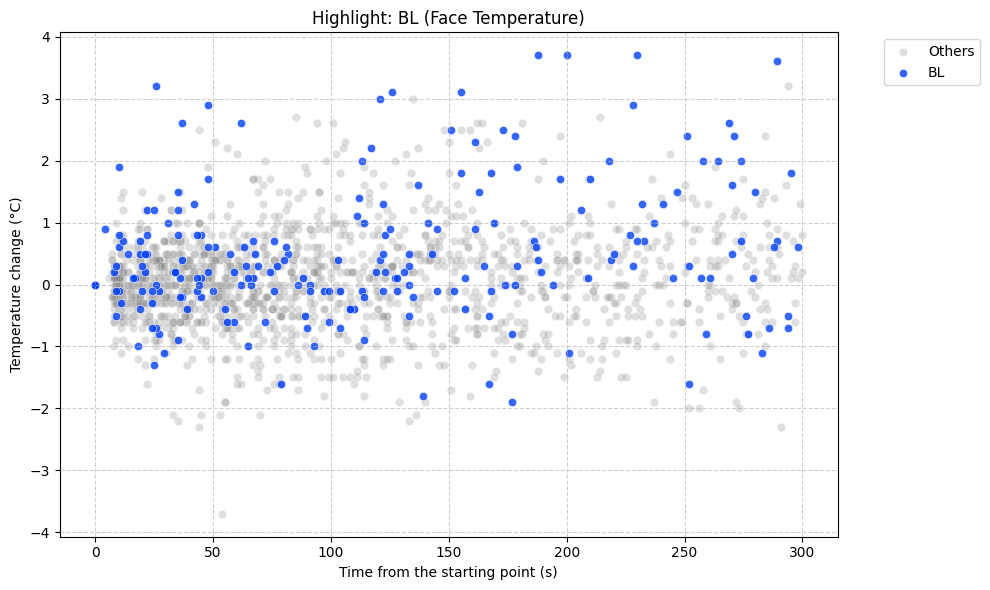

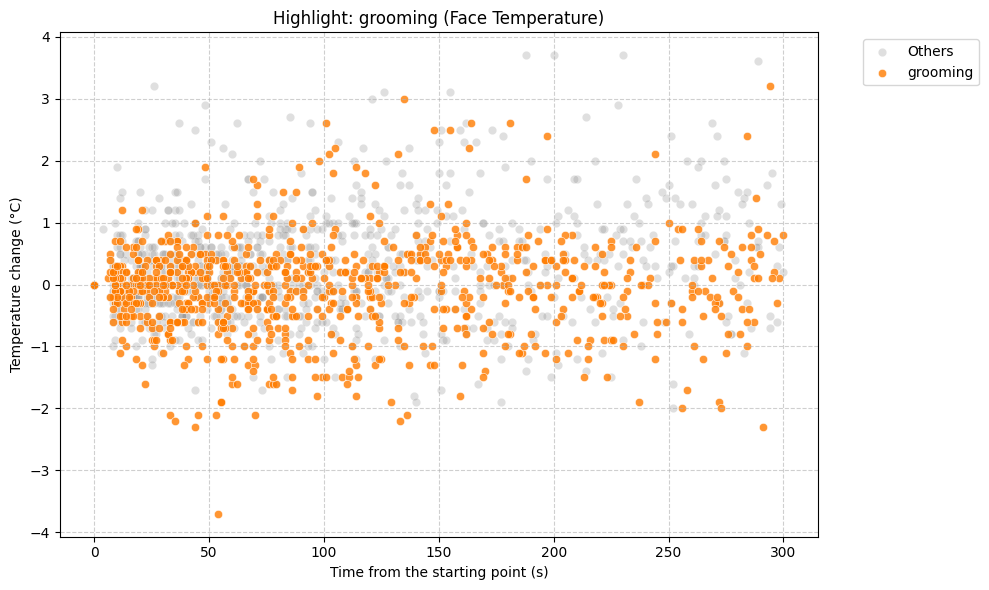

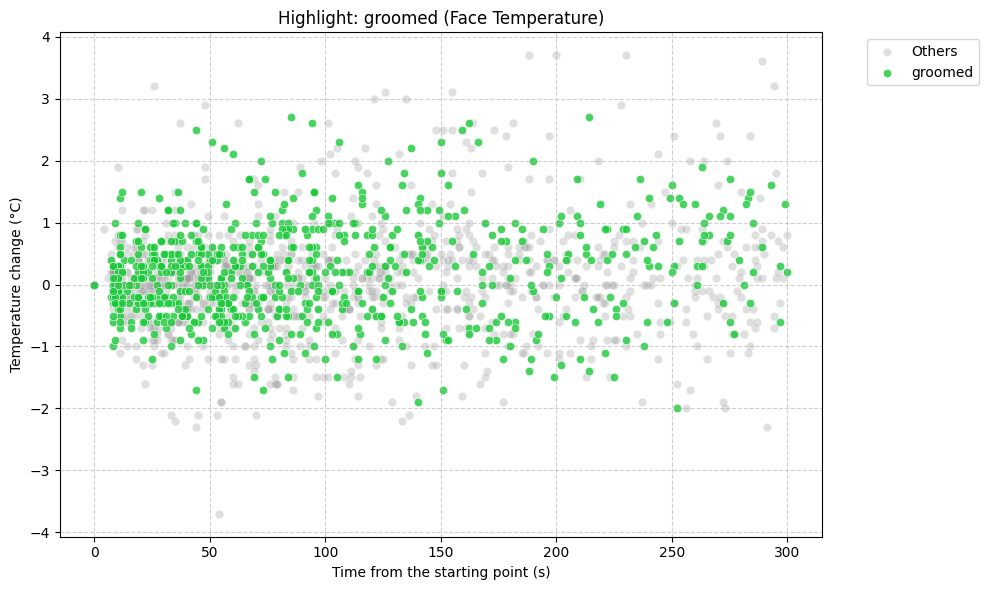

In [7]:
for behavior in delta_df['behavior'].unique():
    self.plot_highlight_behavior(delta_df, target_behavior=behavior, y_column='delta_face')

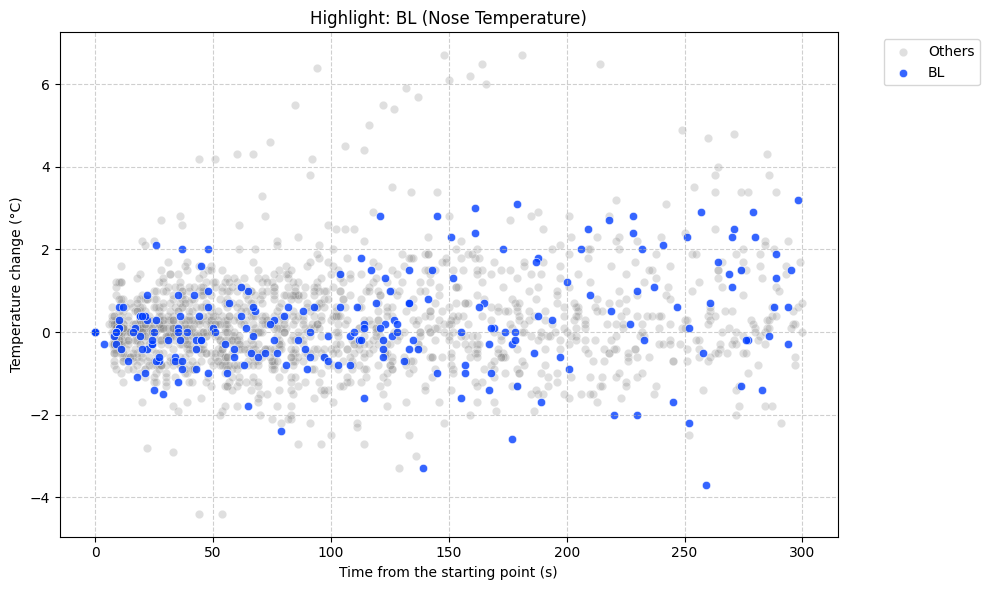

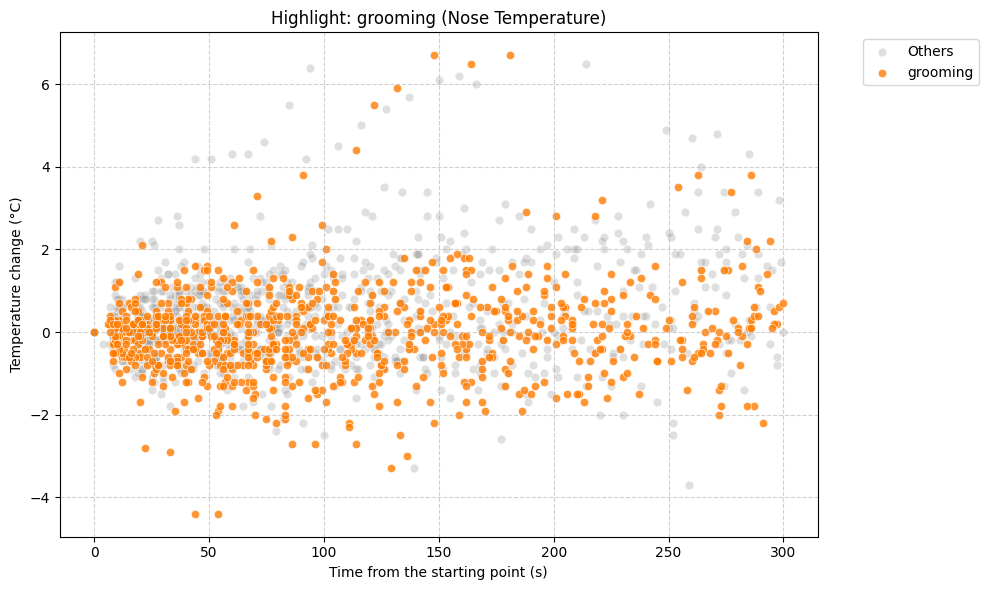

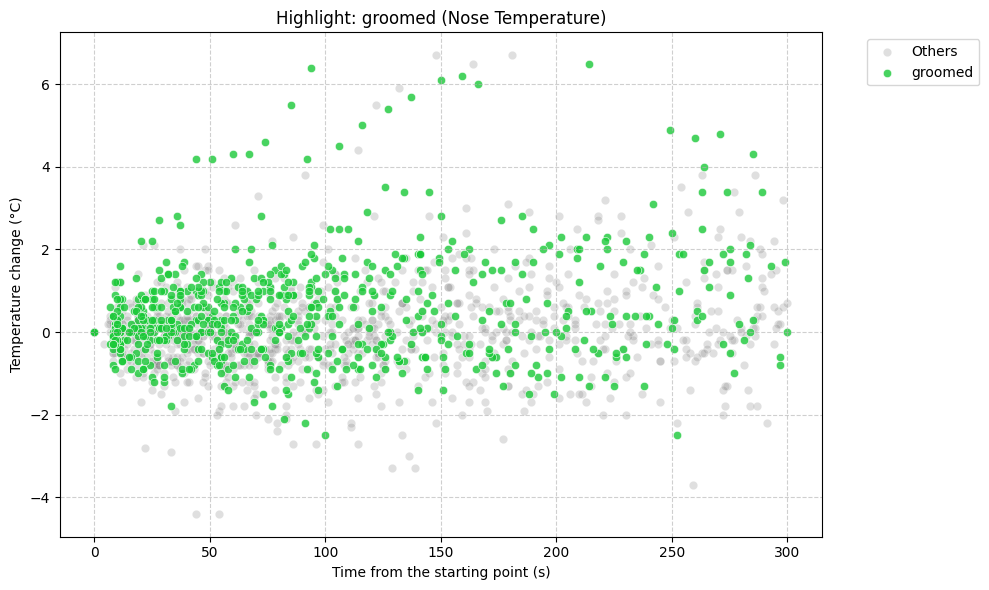

In [8]:
for behavior in delta_df['behavior'].unique():
    self.plot_highlight_behavior(delta_df, target_behavior=behavior, y_column='delta_nose')

### 平滑化トレンドのプロット

まずは1秒間隔のdfを作成

In [9]:
# 1. 内挿実行（一度だけでOK）
delta_df_1s = self.interpolate_samples(delta_df)

Interpolating 267 samples...


C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:112: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled = resampled.interpolate(method='linear')
C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resampled = resampled.ffill().bfill()
C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:112: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled = resampled.interpolate(method='linear')
C:\Users\yyu33\Downloads\Monkey_Aggression\groom\aim1.py:115: Fu

Interpolation completed.


#### face

全behaviorでの帯プロット

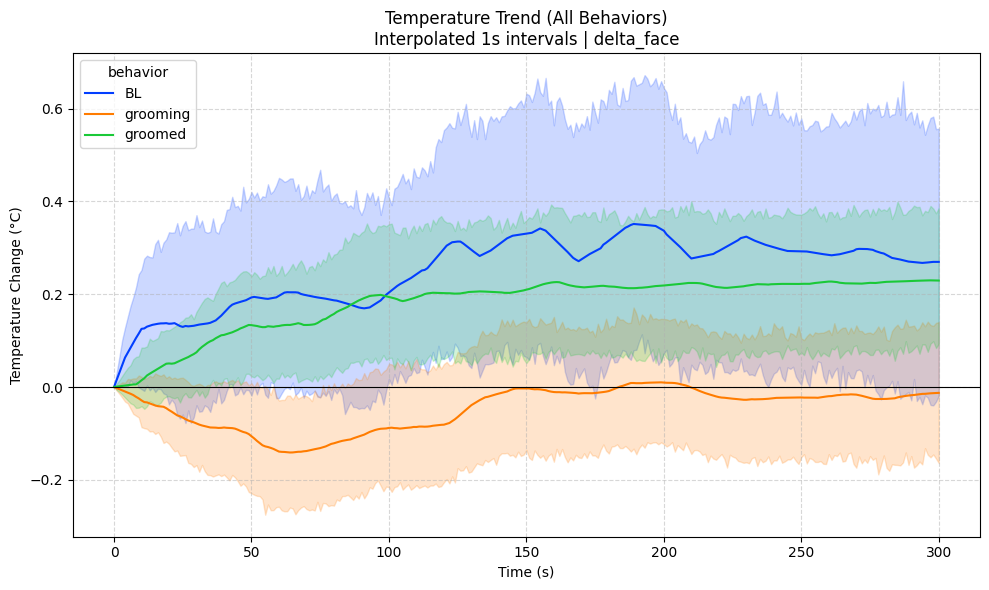

In [10]:
full_delta_face_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_face'
)

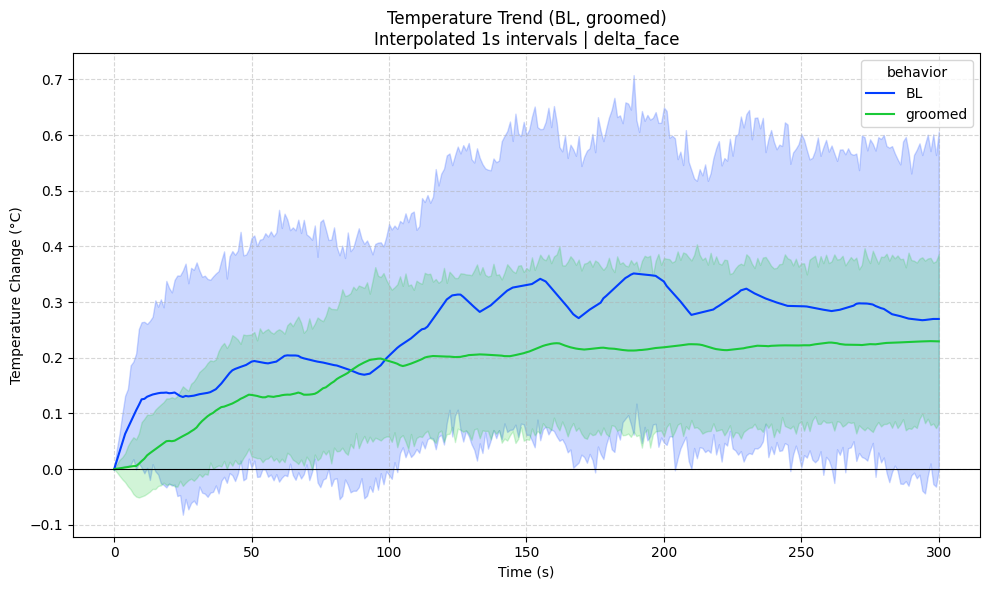

In [14]:
full_delta_face_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_face', target_behaviors=['BL', 'groomed']
)

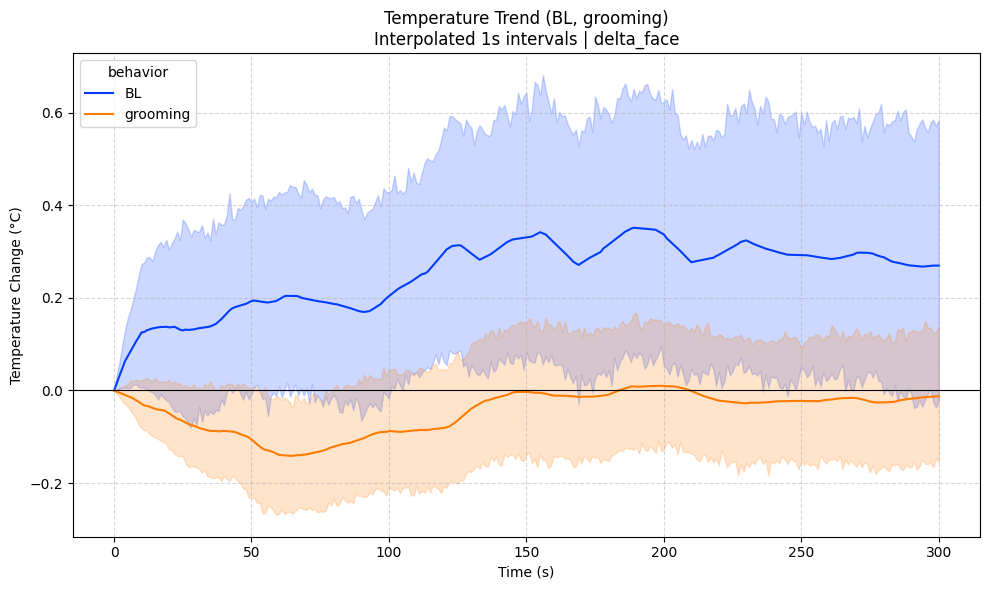

In [16]:
full_delta_face_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_face', target_behaviors=['BL', 'grooming']
)

#### nose

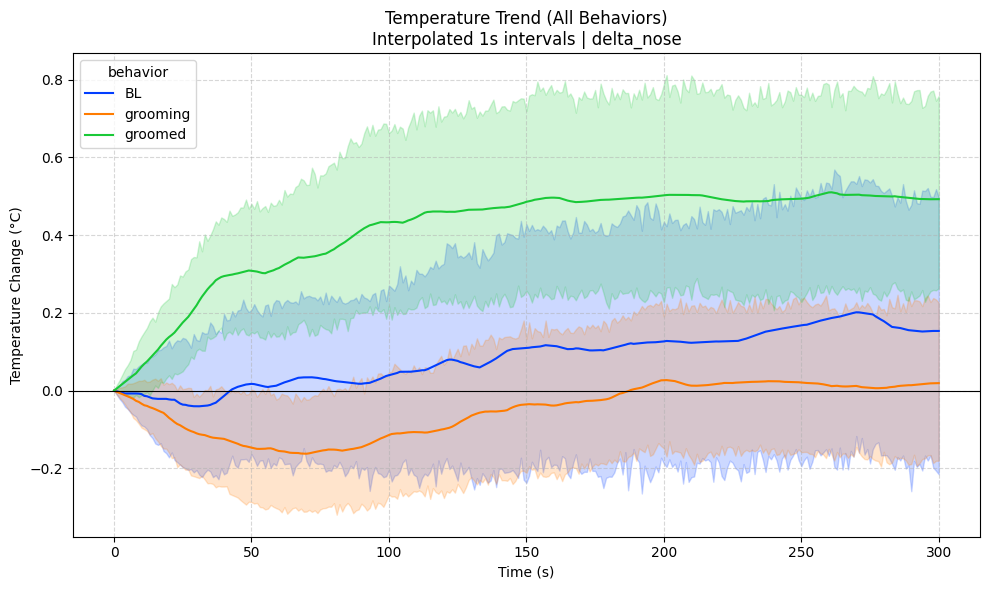

In [12]:
full_delta_nose_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_nose'
)

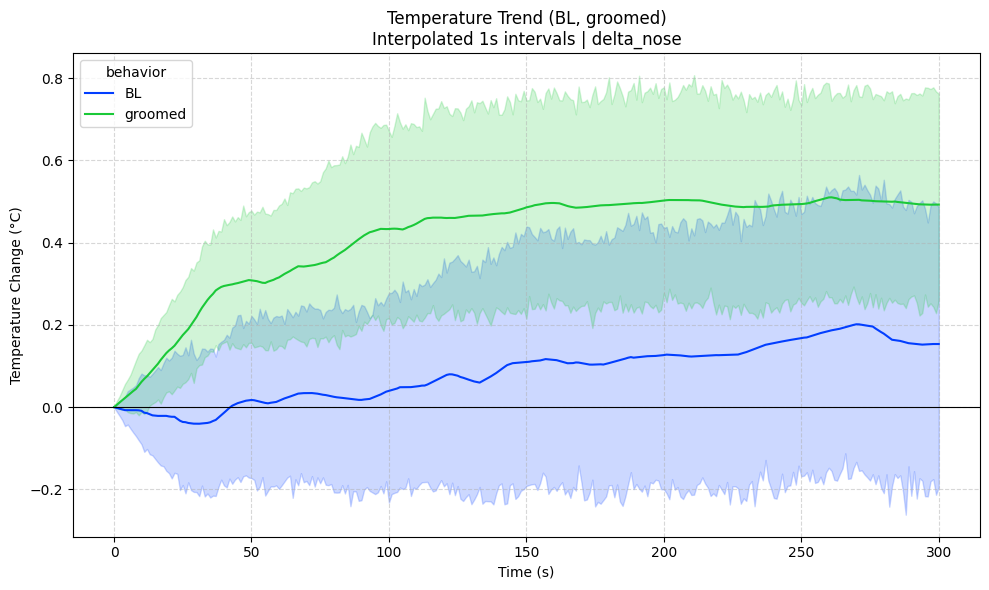

In [15]:
full_delta_face_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_nose', target_behaviors=['BL', 'groomed']
)

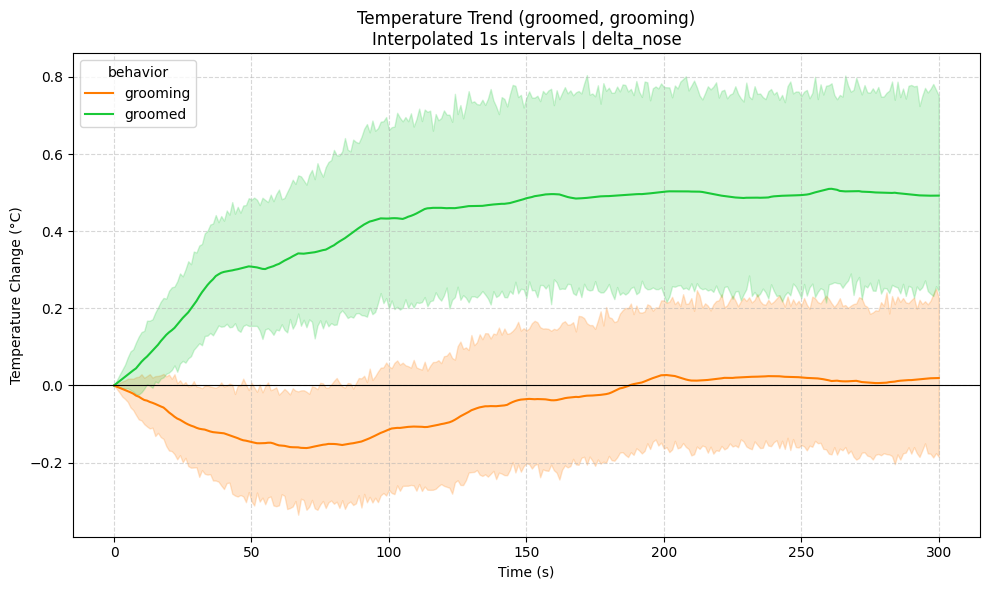

In [18]:
full_delta_face_df = self.plot_smoothed_behavior_comparison(
    delta_df_1s, y_column='delta_nose', target_behaviors=['groomed', 'grooming']
)

### behaviorでの有意差の検証